In [72]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import numpy as np
from skimage.exposure import histogram
from matplotlib.pyplot import bar
from PIL import Image


In [73]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

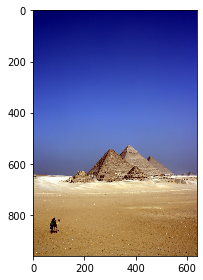

In [74]:
# Ex: imread and imshow 
pyramids = io.imread('pyramids.jpeg')
io.imshow(pyramids)
io.show()



In [75]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

(446, 640, 3)


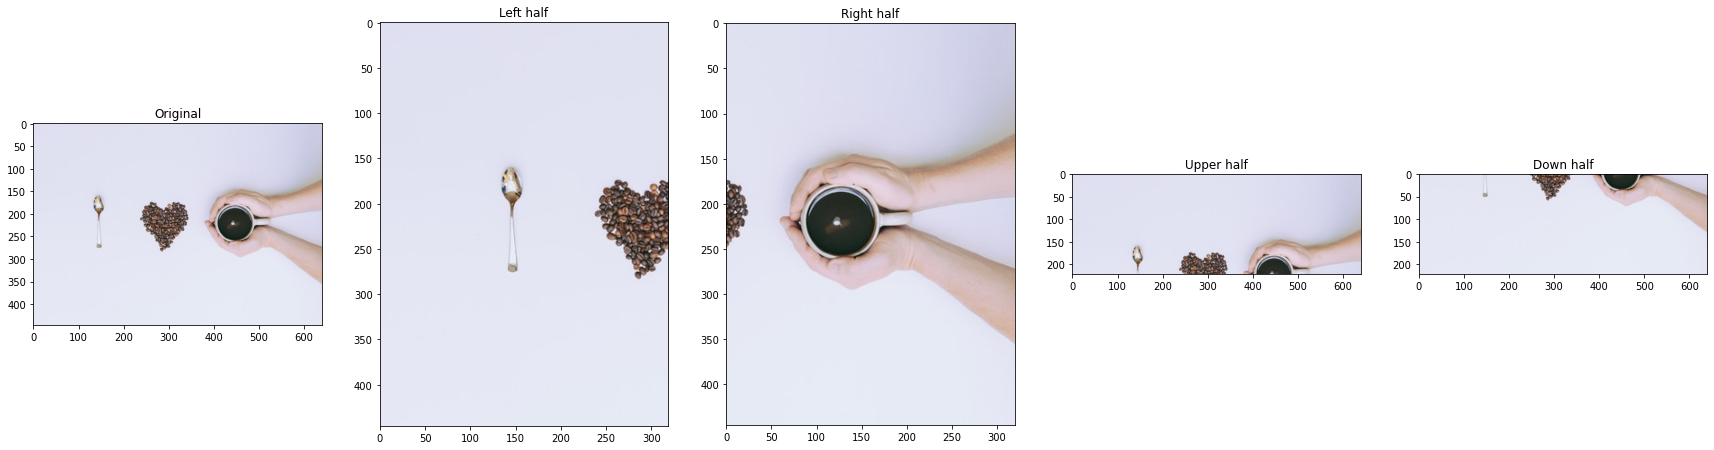

In [76]:
'''
@TODO:
Requirement #1 
-Read and print image 'coffee'  
-Show and print half of the  image
-----hint :use the attribute shape of numpy to get the image object dimentions
'''
coffee = io.imread('coffee.jpeg')
coffee_array = np.array(coffee)
print(coffee_array.shape)
Lhalf_coffee = coffee_array[0:,:319]
Rhalf_coffee = coffee_array[:,320:]
Uhalf_coffee = coffee_array[:222,0:]
Dhalf_coffee = coffee_array[223:,0:]

list_images = [coffee,Lhalf_coffee,Rhalf_coffee,Uhalf_coffee,Dhalf_coffee]
list_titles = ["Original","Left half","Right half","Upper half","Down half"]
show_images(list_images,list_titles)


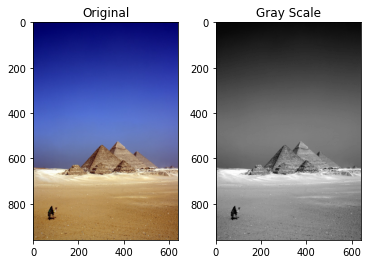

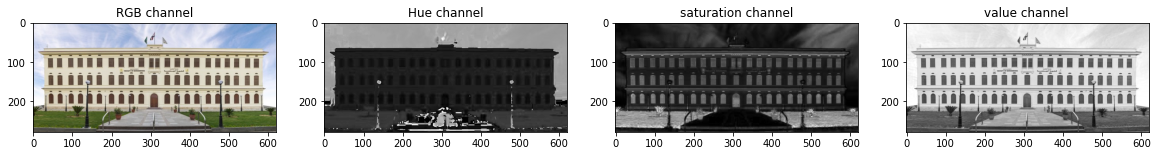

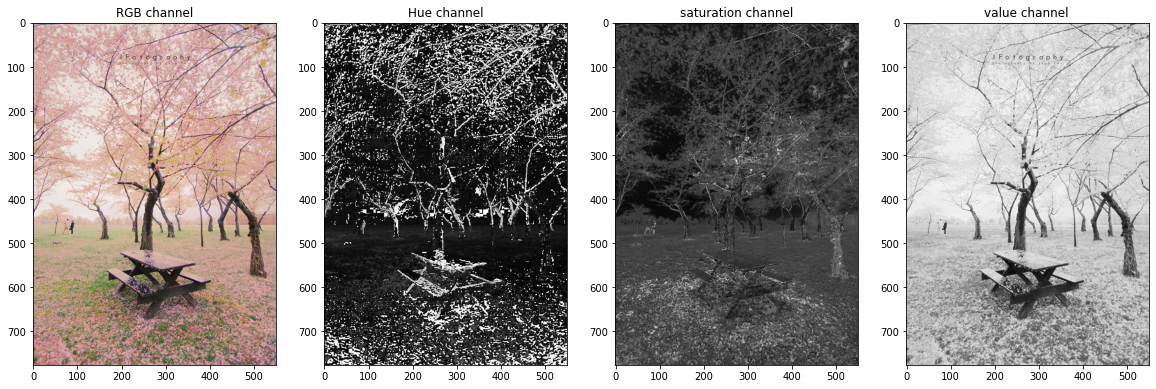

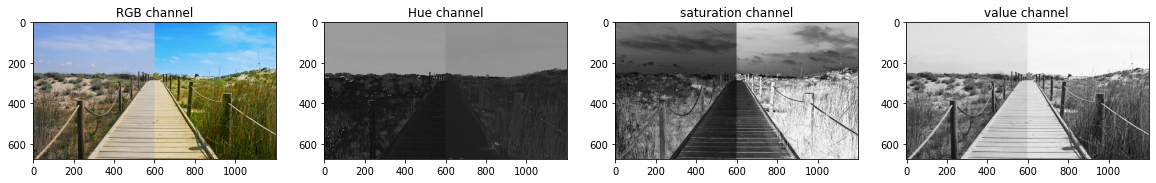

In [77]:
'''
@TODO:
Requirement #2 
RGB to gray and HSV:
1- Write a function 'gray_image' that takes an image as input , then
    -get the gray scale of the image, then
    -display original image and the gray scale one side by side (subplot).
    -hint: use rgb2gray to get the graylevel of the image
- test your function with the image 'pyramids'
'''
def gray_image(img):
    gray_image = rgb2gray(img)
    figure , axis = plt.subplots(1,2)
    axis [0].imshow(img)
    axis [0].set_title("Original")
    axis [1].imshow(gray_image)
    axis [1].set_title("Gray Scale")

'''   
2- Write a function 'HSV_image' that takes an image as input , then
   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).
   -hint: -use rgb2hsv (to get the hsv representation of the image).
          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], 
           where hsvImg is the hsv representation of the image. 
           Hue is the first channel, Saturation is the second and value is the last channel.
- test your function for the images in HSV Folder. And comment on the results. 
'''
def HSV_image(img):
    HSV_image = rgb2hsv(img)
    hue = HSV_image[:,:,0]
    saturation = HSV_image[:,:,1]
    value = HSV_image[:,:,2]

    fig , ax = plt.subplots(ncols=4, figsize=(20, 20))
    ax[0].imshow(img)
    ax[0].set_title("RGB channel")
    ax[1].imshow(hue)
    ax[1].set_title("Hue channel")
    ax[2].imshow(saturation)
    ax[2].set_title("saturation channel")
    ax[3].imshow(value)
    ax[3].set_title("value channel ")

    
gray_image(pyramids) 
image = io.imread("hsv/ex1.png")
HSV_image(image)
image = io.imread("hsv/ex2.jpg")
HSV_image(image)
image = io.imread("hsv/ex3.jpg")
HSV_image(image)

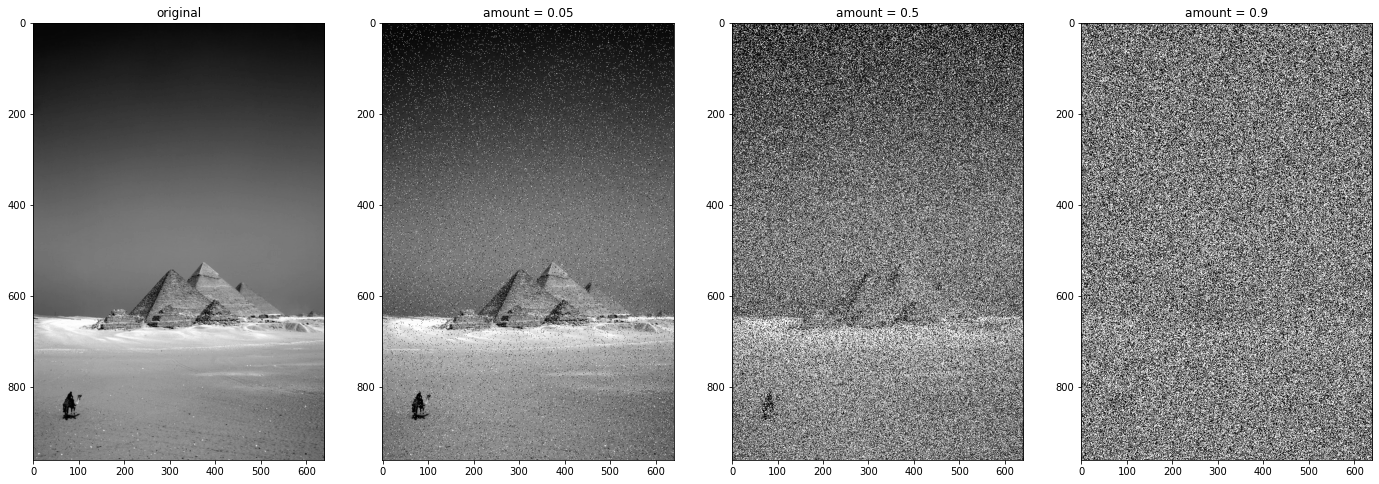

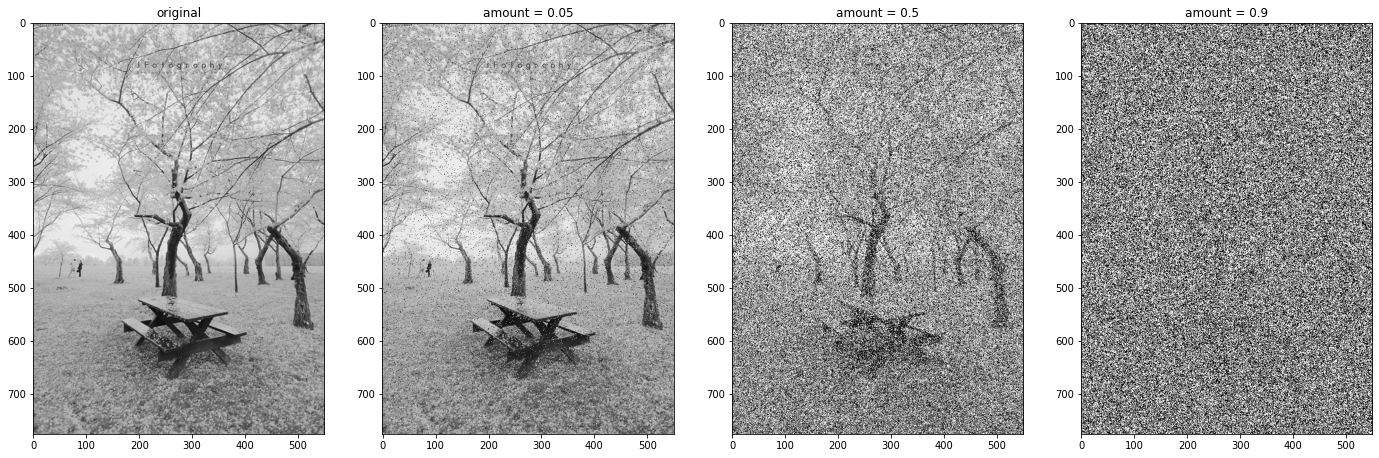

In [78]:
'''
Requirement 2 (Noise):
http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise

1.For an image of your choice (the effect of noise must be obvious): 
    Read the image.
    Convert it to greyscale.
    Apply salt & pepper noise with 
    amount=0.05, 0.5 and 0.9

2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    
    '''
# amount : Proportion of image pixels to replace with noise on range [0, 1]
gray_image = rgb2gray(pyramids)
noisy_image1 = random_noise(gray_image,'s&p',amount=0.05)  
noisy_image2 = random_noise(gray_image,'s&p',amount=0.5)
noisy_image3 = random_noise(gray_image,'s&p',amount=0.9)
list_images = [rgb2gray(pyramids) , noisy_image1 , noisy_image2 , noisy_image3]
list_titles = ["original","amount = 0.05", "amount = 0.5","amount = 0.9"]
show_images(list_images,list_titles)

# un affected image :
path_image = "hsv/ex2.jpg"
tree_image = io.imread(path_image)
gray_image = rgb2gray(tree_image)
noisy_image1 = random_noise(gray_image,'s&p',amount=0.05)  
noisy_image2 = random_noise(gray_image,'s&p',amount=0.5)
noisy_image3 = random_noise(gray_image,'s&p',amount=0.9)
list_images = [rgb2gray(tree_image) , noisy_image1 , noisy_image2 , noisy_image3]
list_titles = ["original","amount = 0.05", "amount = 0.5","amount = 0.9"]
show_images(list_images,list_titles)


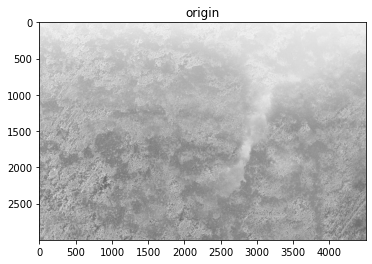

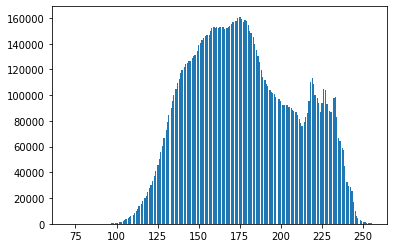

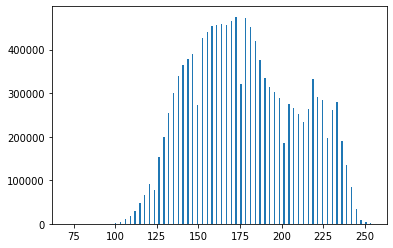

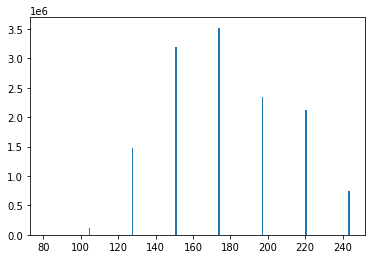

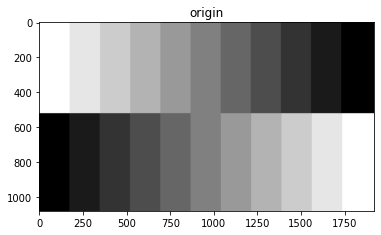

C:\Users\Menna\AppData\Local\Temp/ipykernel_5608/347089524.py:22: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray_image = rgb2gray(images[i])


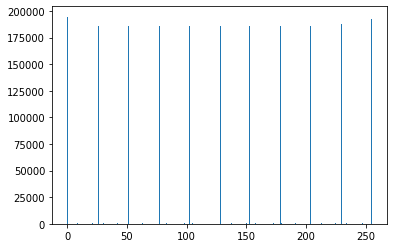

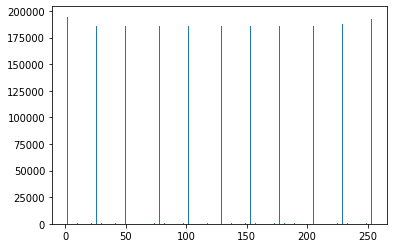

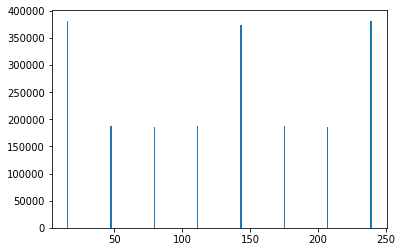

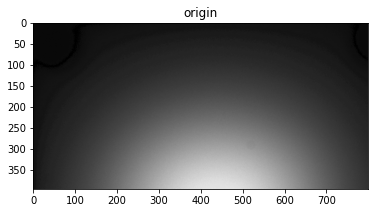

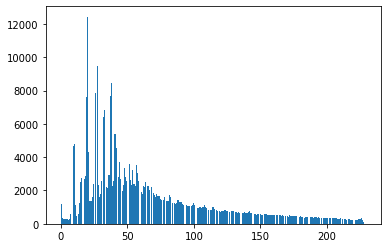

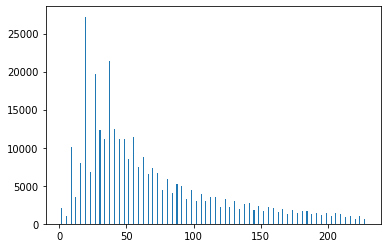

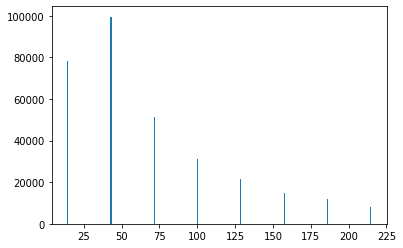

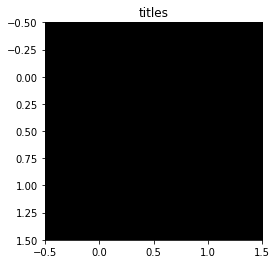

In [89]:
'''
Requirement 3 (Histogram):

1- For the given images ( in histogram folder): 
    Read the image.
    Apply histogram and show it.
Hint
    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?
    B) and function(showHist) to draw it.
** 2- Draw a grey-scale image that has uniform histogram 
same number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.
use np.ones to draw image with ones.
'''
# nbins : Number of bins used to calculate histogram
# channel_axis : If None, the image is assumed to be a grayscale (single channel) image. Otherwise, this parameter indicates which axis of the array corresponds to channels.
images = []
images.append(io.imread("histogram/ex1.jpg")) 
images.append(io.imread("histogram/ex2.png"))
images.append(io.imread("histogram/ex3.png"))
for i in range (0,3):
    show_images([images[i]],["origin"])
    gray_image = rgb2gray(images[i])
    histogram_img = histogram(gray_image,nbins=256)
    showHist(image,histogram_img)
    histogram_img = histogram(gray_image,nbins=64)
    showHist(image,histogram_img)
    histogram_img = histogram(gray_image,nbins=8)
    showHist(image,histogram_img)


# part 2 :
uniform_image= np.ones((256,256))
show_images([Image],["titles"])
# showHist(uniform_image,uniform_image)
